# TensorBoard

TensorBoard provides the visualization and tooling needed for machine learning experimentation:

* Tracking and visualizing metrics such as loss and accuracy
* Visualizing the model graph (ops and layers)
* Viewing histograms of weights, biases, or other tensors as they change over time
* Projecting embeddings to a lower dimensional space
* Displaying images, text, and audio data
* Profiling TensorFlow programs
* [And much more](https://www.tensorflow.org/tensorboard)

```{contents}
:local:
```

In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [2]:
import datetime

import tensorflow as tf

In [3]:
# Clear any logs from previous runs
!rm -rf ./tensorboard/logs/

In [4]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

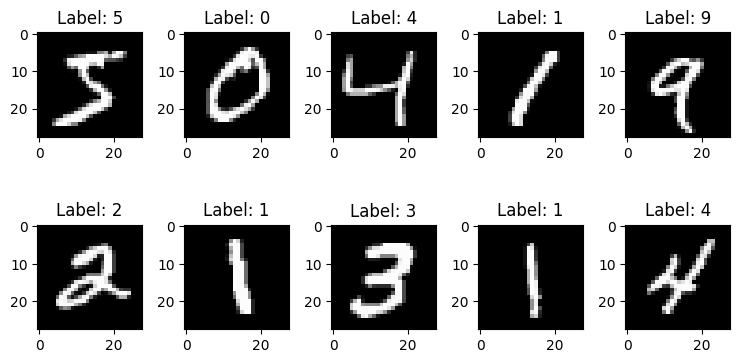

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

num_row = 2
num_col = 5
num = num_row * num_col
images = x_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5 * num_col, 2 * num_row))
for i in range(num):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(images[i], cmap="gray")
    ax.set_title("Label: {}".format(labels[i]))
plt.tight_layout()
plt.show()

In [6]:
# Function to creates a simple Keras model for classifying the MNIST images into 10 classes
def create_model():
    return tf.keras.models.Sequential(
        [
            tf.keras.layers.Flatten(input_shape=(28, 28), name="layers_flatten"),
            tf.keras.layers.Dense(512, activation="relu", name="layers_dense"),
            tf.keras.layers.Dropout(0.2, name="layers_dropout"),
            tf.keras.layers.Dense(10, activation="softmax", name="layers_dense_2"),
        ]
    )

## Using TensorBoard with Keras Model.fit()

When training with Keras's Model.fit(), adding the tf.keras.callbacks.TensorBoard callback ensures that logs are created and stored. Additionally, enable histogram computation every epoch with histogram_freq=1 (this is off by default)

In [7]:
model = create_model()
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# Place the logs in a timestamped subdirectory to allow easy selection of different training runs.
log_dir = "tensorboard/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(
    x=x_train,
    y=y_train,
    epochs=5,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback],
)

Epoch 1/5


/Users/ariefrahmansyah/Library/Caches/pypoetry/virtualenvs/applied-python-training-MLD32oJZ-py3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8916 - loss: 0.3658 - val_accuracy: 0.9678 - val_loss: 0.1073
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9690 - loss: 0.1023 - val_accuracy: 0.9773 - val_loss: 0.0743
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9791 - loss: 0.0663 - val_accuracy: 0.9781 - val_loss: 0.0697
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9840 - loss: 0.0494 - val_accuracy: 0.9794 - val_loss: 0.0658
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9862 - loss: 0.0421 - val_accuracy: 0.9790 - val_loss: 0.0666


Start TensorBoard through the command line or within a notebook experience. The two interfaces are generally the same. In notebooks, use the %tensorboard line magic. On the command line, run the same command without "%".

In [8]:
%tensorboard --logdir tensorboard/logs/fit

A brief overview of the visualizations created in this example and the dashboards (tabs in top navigation bar) where they can be found:

* Scalars show how the loss and metrics change with every epoch. You can use them to also track training speed, learning rate, and other scalar values. Scalars can be found in the Time Series or Scalars dashboards.
* Graphs help you visualize your model. In this case, the Keras graph of layers is shown which can help you ensure it is built correctly. Graphs can be found in the Graphs dashboard.
* Histograms and Distributions show the distribution of a Tensor over time. This can be useful to visualize weights and biases and verify that they are changing in an expected way. Histograms can be found in the Time Series or Histograms dashboards. Distributions can be found in the Distributions dashboard.

Additional TensorBoard dashboards are automatically enabled when you log other types of data. For example, the Keras TensorBoard callback lets you log images and embeddings as well. You can see what other dashboards are available in TensorBoard by clicking on the "inactive" dropdown towards the top right.